In [2]:
!pip install control

   ---------------------------------------- 0.0/549.6 kB ? eta -:--:--
   ----------------------------- --------- 409.6/549.6 kB 12.9 MB/s eta 0:00:01
   --------------------------------------- 549.6/549.6 kB 11.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

## Define the plantTrue)


C:\Users\sassaroli\AppData\Local\anaconda3\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


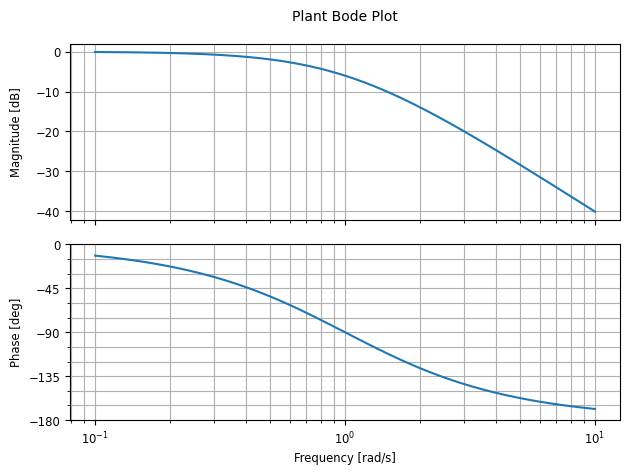

In [46]:
# Define a simple second-order plant: G(s) = 1 / (s^2 + 2s + 1)
num = [1]
den = [1, 2, 1]
G = ctrl.TransferFunction(num, den)

# Plot Bode of the plant
mag, phase, omega = ctrl.bode(G, dB=True, plot=True, title='Plant Bode Plot')

C:\Users\sassaroli\AppData\Local\anaconda3\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


Gain Margin: 3.06, Phase Margin: 33.93°, Crossover Frequency: 0.68 rad/s


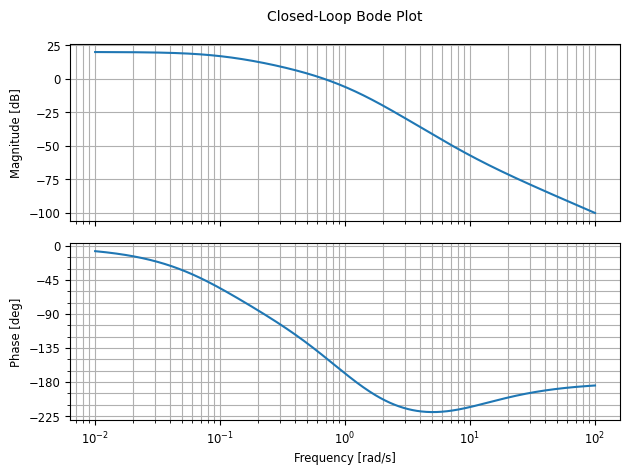

In [47]:
# Define a lead compensator: D(s) = (s + 10) / (10s + 1)
D = ctrl.TransferFunction([1, 10], [10, 1])

# Open-loop transfer function
L = D * G

# Bode plot of open-loop L = D*G
mag, phase, omega = ctrl.bode(L, dB=True, plot = True, title='Closed-Loop Bode Plot')

# Gain and phase margins
gm, pm, wg, wp = ctrl.margin(L)
print(f"Gain Margin: {gm:.2f}, Phase Margin: {pm:.2f}°, Crossover Frequency: {wp:.2f} rad/s")

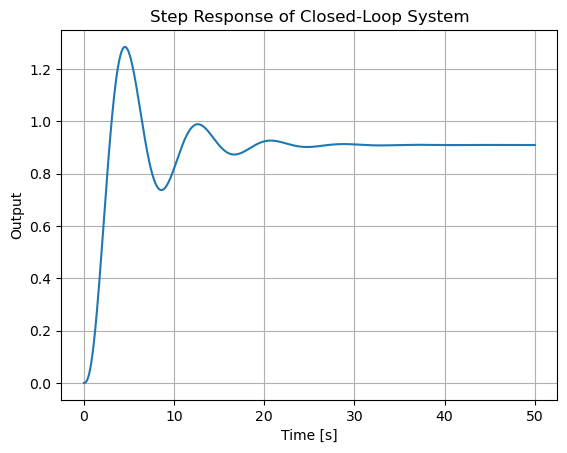

In [44]:
# Closed-loop system T = L / (1 + L)
T = ctrl.feedback(L)

# Step response
t = np.linspace(0, 50, 1000)
t, y = ctrl.step_response(T, t)

plt.figure()
plt.plot(t, y)
plt.title('Step Response of Closed-Loop System')
plt.xlabel('Time [s]')
plt.ylabel('Output')
plt.grid(True)
plt.show()